In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('../data/ingested/processed_data.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_number  2473 non-null   object
 1   date         2473 non-null   object
 2   consumption  2473 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 58.1+ KB


In [45]:
df.head()

,item_number,date,consumption
0,50040800100,2022-01-01,170
1,50040800100,2022-01-03,172
2,50040800100,2022-01-05,188
3,50040800100,2022-01-07,228
4,50040800100,2022-01-09,171


In [46]:
df.item_number.unique() ,df.date.min(), df.date.max()

(array(['50040800100', '50060820106', 'D30100558A', 'D30200678',
        'D30200679', 'D30200680', 'D30200717', 'UMM30200190',
        'UMM30200632'], dtype=object),
 '2022-01-01',
 '2023-10-31')

In [47]:
df.item_number.value_counts()

50060820106    291
D30200678      291
D30200679      290
UMM30200190    290
50040800100    289
D30100558A     281
UMM30200632    274
D30200680      266
D30200717      201
Name: item_number, dtype: int64

In [48]:
df[df.item_number == 'D30200678'].date.min(), df[df.item_number == 'D30200678'].date.max()

('2022-01-01', '2023-10-31')

<Axes: xlabel='date', ylabel='consumption'>

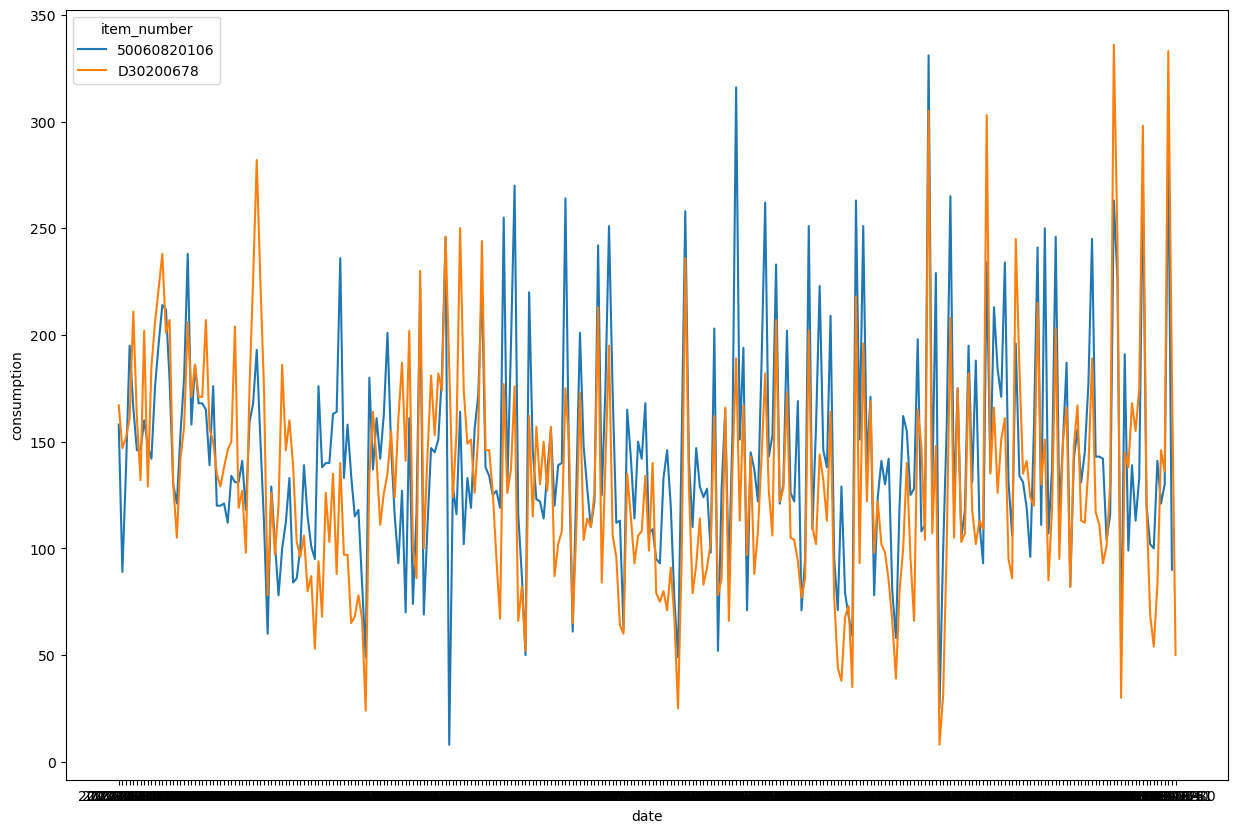

In [49]:
plt.figure(figsize = (15,10))
sns.lineplot(data = df[df.item_number.isin(['D30200678','50060820106'])], x = 'date', y = 'consumption', hue = 'item_number' )


In [60]:
## build a very dirty and quick machine learning model
test1 = df[df.item_number == 'D30200678']
test1.head()

,item_number,date,consumption
861,D30200678,2022-01-01,167
862,D30200678,2022-01-03,147
863,D30200678,2022-01-05,152
864,D30200678,2022-01-07,161
865,D30200678,2022-01-09,211


In [65]:
test1.tail()

,item_number,date,consumption
1147,D30200678,2023-10-22,83
1148,D30200678,2023-10-24,146
1149,D30200678,2023-10-26,136
1150,D30200678,2023-10-30,333
1151,D30200678,2023-10-31,180


In [67]:
test1

,item_number,date,consumption
861,D30200678,2022-01-01,167
862,D30200678,2022-01-03,147
863,D30200678,2022-01-05,152
864,D30200678,2022-01-07,161
865,D30200678,2022-01-09,211
...,...,...,...
1147,D30200678,2023-10-22,83
1148,D30200678,2023-10-24,146
1149,D30200678,2023-10-26,136
1150,D30200678,2023-10-30,333


In [70]:
test1['date'] = pd.to_datetime(test1['date'])
test1.set_index('date',inplace = True)

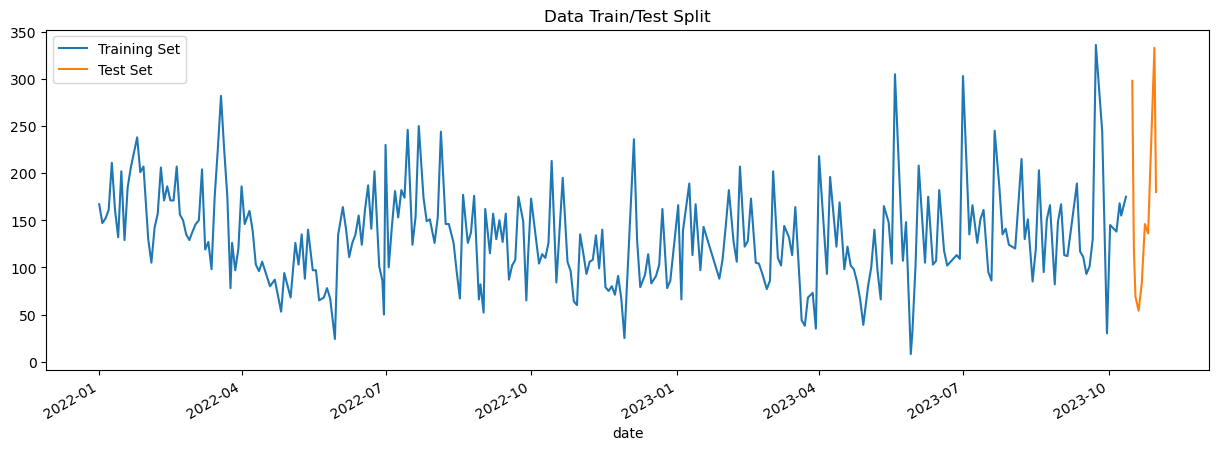

In [71]:
##明确目的，我们利用20天的训练数据，1天作为验证数据，
#test1.set_index('date',inplace = True)
# train = df[df.index < '2023-07-02']
# test = df[df.index >= '2023-07-02']
train = test1.loc[test1.index < '2023-10-15']
test = test1.loc[test1.index >= '2023-10-15']

fig, ax = plt.subplots(figsize=(15, 5))
train[['consumption']].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test[['consumption']].plot(ax=ax, label='Test Set')
#ax.axvline('2023-06-29 00:00:00', color='black', ls='--')
ax.legend(['Training Set','Test Set'])
plt.show()

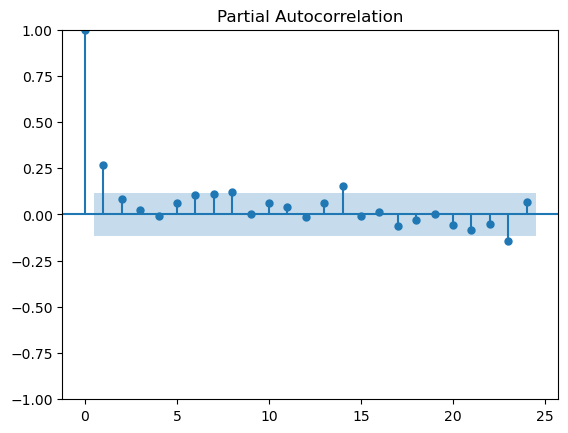

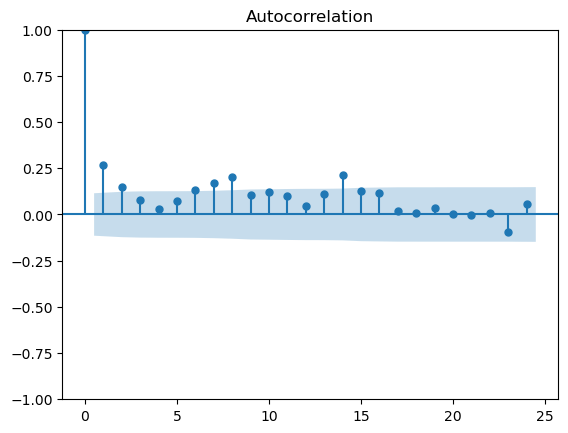

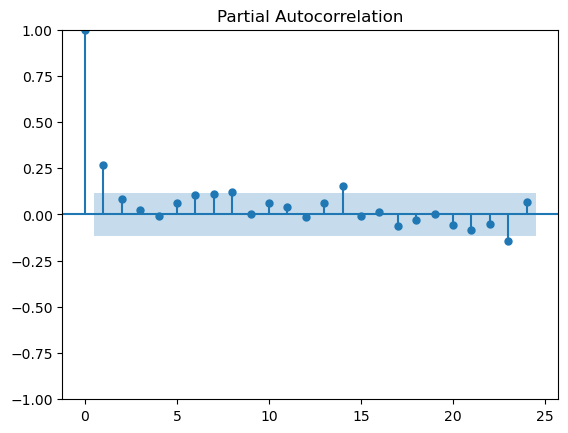

In [73]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(test1.consumption, lags=24)
plot_pacf(test1.consumption, lags=24)